In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Quora_question_pairs.csv")

In [4]:
df.shape

(404290, 6)

In [14]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
174808,174808,269304,269305,"In what different ways can ""Whoever has will b...","Is it true ""Whoever has will be given more, an...",1
278983,278983,14288,29169,My question was marked as needing improvement!...,The question was marked as needing improvement...,1
331727,331727,458642,458643,What is U.Lab?,What is a lab?,0
207572,207572,311297,311298,Can one cancel a confirmed Tatkal e-ticket if ...,What are the cancellation charges for tatkal w...,0
150865,150865,25969,76304,What does it feel like to have your penis suck...,How can I convince my girlfriend to suck my pe...,0
319377,319377,166188,444799,What are biodegradable polymers? What are some...,What are some examples of biodegradable and no...,0
390762,390762,523304,254210,What things the doesn’t the US Government want...,What are some things that the US government do...,1
359880,359880,67866,67027,How can we read people's mind?,How do I read minds?,1
178238,178238,273811,273812,What happened to Ned Stark's bones?,Did Ned Stark warg before he was killed?,0
340385,340385,468105,468106,Who wrote the Bill of Rights?,Who wrote the English bill of rights?,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

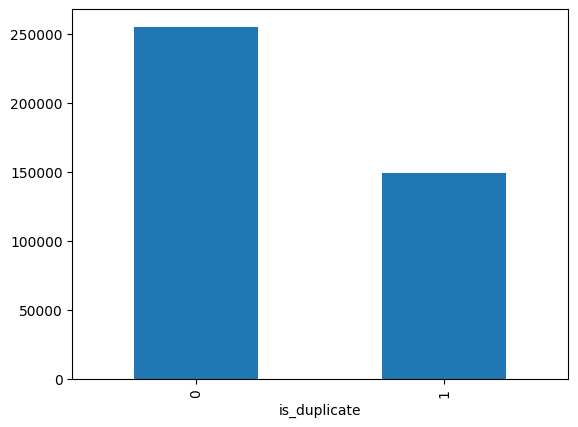

In [10]:
## DIstribution of duplicate and non-duplicate pairs

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [12]:
# repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts() > 1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


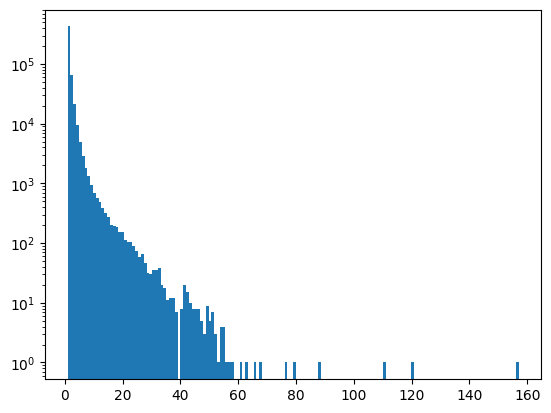

In [13]:
#Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()